# DATA 620
# Assignment – High Frequency Words
by Don Padmaperuma & Grace Han

1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting,
defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

In [65]:
import nltk as nltk
import pandas as pd
import matplotlib.pyplot as plt
import string
import numpy as np

## Choose a corpus of interest

The Brown Corpus was the first million-word electronic corpus of English, created in 1961 at Brown University. This corpus contains text from 500 sources, and the sources have been categorized by genre, such as news, editorial, and so on. 1.1 gives an example of each genre (for a complete list, see http://icame.uib.no/brown/bcm-los.html).

In [66]:
from nltk.corpus import brown

In [67]:
nltk.download('brown')


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [68]:
brown.words()[:10]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of']

In [69]:
len(brown.words())

1161192

## find unique words in brown corpus

In our next process we will remove the common english words/stopwords such as 'a', 'the' etc. Also we have import string package for punctuations. But the string package do not comes with all the punctuations. So we added extra punctuations to the list.



In [70]:
# I found that string.punctuation did not include all the punctuations of brown words, here I added extra punctuation in the following list
punctuation = ['!','"','#','$','%','&',"'",'(',')','*','+',',','-','.','/',':',';','<','=','>','?','@','[','\\',']','^','_','`','{','|','}','~','``',"''",'--']

In [71]:

from nltk.corpus import stopwords
lower_words = [x.lower() for x in brown.words()]
pun_stop = punctuation + stopwords.words('english')
filter_words1 = [x for x in lower_words if x not in pun_stop]
filter_brown = list(filter(lambda x: x.isalpha() and len(x) > 1, filter_words1)) # remove numbers and single letter words

In [72]:
#unique words in the corpus
brown_unique = set(filter_brown)
len(brown_unique)

40079

In [31]:
#frequency distribution
freq_dis = nltk.FreqDist(filter_brown)
print(freq_dis)

<FreqDist with 40079 samples and 508631 outcomes>


## Most common words, how many unique words represent half of the total words in the corpus?

In [50]:
#Create Cumulative Frequency Table
df_all_words = pd.DataFrame(filter_brown)
df_all_words.columns = ['word']
df_all_words_freq = pd.DataFrame(df_all_words['word'].value_counts()).reset_index(drop=False)
df_all_words_freq.columns = ['word', 'frequency']
df_all_words_freq['cumulative_frequency'] = df_all_words_freq['frequency'].cumsum()
df_all_words_freq.sort_values(by='frequency', ascending=False).head(20)


,word,frequency,cumulative_frequency
0,one,3292,3292
1,would,2714,6006
2,said,1961,7967
3,new,1635,9602
4,could,1601,11203
5,time,1598,12801
6,two,1412,14213
7,may,1402,15615
8,first,1361,16976
9,like,1292,18268


In [52]:
# Number of words that represent half of the total words in the corpus
len(df_all_words_freq[df_all_words_freq['cumulative_frequency'] <= 508631/2])

1261

## 200 highest frequency words in this corpus

In [54]:
for key,value in freq_dis.most_common(200):
    print(key,value)

one 3292
would 2714
said 1961
new 1635
could 1601
time 1598
two 1412
may 1402
first 1361
like 1292
man 1207
even 1170
made 1125
also 1069
many 1030
must 1013
af 996
back 966
years 950
much 937
way 908
well 897
people 847
little 831
state 807
good 806
make 794
world 787
still 782
see 772
men 763
work 762
long 752
get 749
life 715
never 697
day 687
another 684
know 683
last 676
us 675
might 672
great 665
old 661
year 658
come 630
since 628
go 626
came 622
right 613
used 611
take 610
three 610
states 603
house 591
use 591
without 583
place 570
american 569
around 562
however 552
home 547
small 542
found 536
thought 517
went 507
say 504
part 500
general 498
high 497
upon 495
school 493
every 491
got 482
united 482
left 480
number 472
course 465
war 464
always 458
away 456
something 450
fact 447
water 445
though 440
public 438
less 437
put 437
think 433
almost 432
hand 431
enough 430
took 426
far 426
head 424
yet 419
government 418
system 416
set 414
better 414
told 413
night 411
nothing 41

## Create a graph that shows the relative frequency of these 200 words.

In [57]:
df = pd.DataFrame(freq_dis.most_common(200))
df.columns = ['word', 'frequency']
df.head()

,word,frequency
0,one,3292
1,would,2714
2,said,1961
3,new,1635
4,could,1601


In [61]:
# Calculate relative frequency
df['relative_frequency'] = df['frequency']/df['frequency'].sum()

df = df.reset_index(drop=False)
df.head(20)

,level_0,index,word,frequency,relative_frequency
0,0,0,one,3292,0.029808
1,1,1,would,2714,0.024574
2,2,2,said,1961,0.017756
3,3,3,new,1635,0.014804
4,4,4,could,1601,0.014497
5,5,5,time,1598,0.014469
6,6,6,two,1412,0.012785
7,7,7,may,1402,0.012695
8,8,8,first,1361,0.012323
9,9,9,like,1292,0.011699


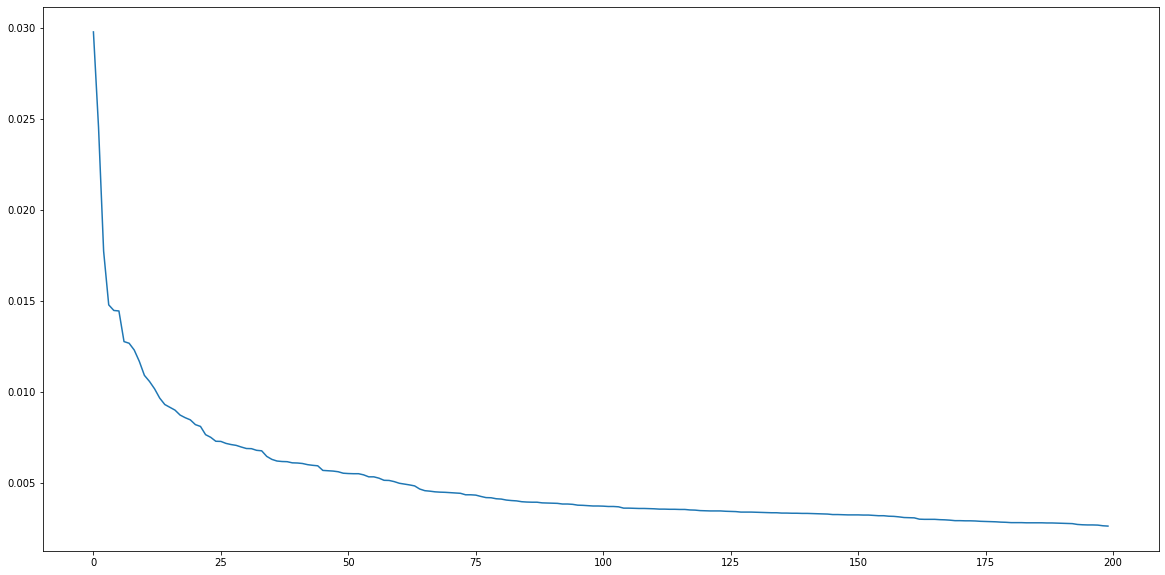

In [62]:
plt.figure(3,figsize=(20,10))
df['relative_frequency'].plot()

## Does the observed relative frequency of these words follow Zipf’s law? Explain.

Zipf’s law: the frequency of any word is inversely proportional to
its rank in the frequency table. Thus the most frequent word will
occur approximately twice as often as the second most frequent
word, which occurs twice as often as the fourth most frequent
word, etc. 
According to the graph below, it safe to say that the 200 most common words roughly follow Zipf's law eventhough its not perfect.

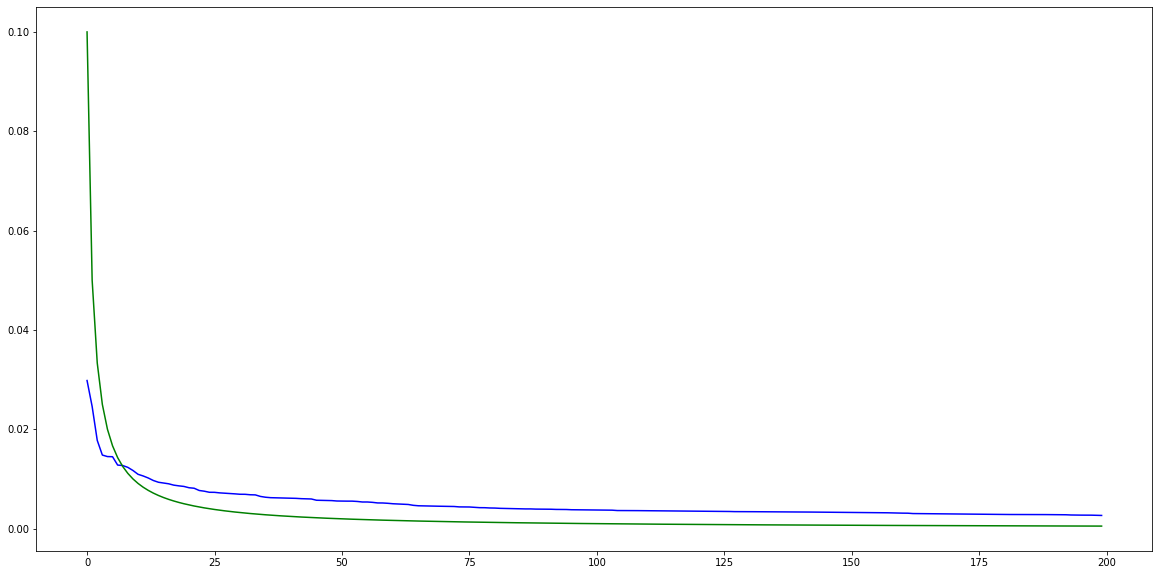

In [64]:
df['zip_probability'] = 0.1/(df['index'] + 1)
plt.figure(3,figsize=(20,10))
plt.plot(df['relative_frequency'], 'blue')
plt.plot(df['zip_probability'], 'green')
plt.show()

## In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

 it is a general language corpus containing 500 samples of American English, totaling roughly one million words, compiled from works published in the United States in 1961. It is considered small and slightly dated compared to other corporas available. 


Reference:
https://www1.essex.ac.uk/linguistics/external/clmt/w3c/corpus_ling/content/corpora/list/private/brown/brown.html
